# Driver Drowsiness Detection

#### import the required libraries.

In [1]:
# dlib works only on Python version 2.7.x | 3.4.x | 3.5.x | 3.6.x
# https://pypi.org/project/dlib/

from platform import python_version
print(python_version())

3.6.13


### How to install dlib library
        1. Go to Anaconda Prompt (in administrator right)
        2. Make sure in working directory of jupyter book
        3. Create virtual environment: conda create --name <name of your enivronment> python=3.6
        4. Activate your environment: activate <name of your enivronment>
        5. In the virttual environment, install necessary libraries: pip install numpy scipy matplotlib scikit-learn jupyter
        6. Install opencv: pip install opencv-contrib-python
        7. Install cmake: conda install -c anaconda cmake
        8. Install dlib: conda install -c conda-forge dlib 

#### The facial landmark detector implemented inside dlib produces 68 (x, y)-coordinates that map to specific facial structures. 


In [6]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url ='https://www.pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg', width=600, height=500)

In [25]:
import numpy as np
import dlib    #To detect and localize facial landmarks
import cv2
import threading
from threading import Thread
!pip install imutils
import imutils
from imutils import face_utils
from scipy.spatial import distance as dist
!pip install pygame
import pygame

In [26]:
dlib.__version__

'19.22.0'

In [27]:
cv2.__version__

'4.5.2'

In [ ]:
# https://stackoverflow.com/questions/41912372/dlib-installation-on-windows-10
# https://www.youtube.com/watch?v=xXbouOlAyoo
# https://learnopencv.com/install-opencv-3-and-dlib-on-windows-python-only/

In [20]:
# alarm mp3 from:
# https://www.fesliyanstudios.com/royalty-free-sound-effects-download/alarm-203

path = '../Unknown/test_folder/Alarm.mp3'

def sound_alarm():
    pygame.mixer.init()
    pygame.mixer.music.load(path)
    pygame.mixer.music.play()

In [8]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url ='https://www.goeduhub.com/ezoimgfmt/www.pyimagesearch.com/wp-content/uploads/2017/04/blink_detection_plot.jpg?ezimgfmt=rs:607x358/rscb1/ng:webp/ngcb1', width=600, height=500)

In [9]:
def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4]) # vertical distance
    C = dist.euclidean(eye[0], eye[3]) # horizontal distance
 
    ear = (A + B) / (2.0 * C)
    return ear

#### Define parameters

In [10]:
# eye aspect ratio 
# falls below this threshold, we will start counting the number of frames the person has closed their eyes. 
EYE_AR_THRESH = 0.25
# if person has closed their eyes for 35 consecutive frames ,we will play the alarm.
EYE_AR_CONSEC_FRAMES = 20

COUNTER = 0
ALARM_ON = False


In [12]:
# To download the dlib's pre-trained facial landmark detector 
# https://github.com/italojs/facial-landmarks-recognition/blob/master/shape_predictor_68_face_landmarks.dat
predictor_path = 'shape_predictor_68_face_landmarks.dat'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

In [13]:
# Grab the indexes of the facial landmarks for the left and right eye,respectively
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [23]:
# video capture from: https://www.youtube.com/watch?v=Mtz1Iq4Zw1k
cap = cv2.VideoCapture("../Unknown/test_folder/driver2.mp4")
#cap = cv2.VideoCapture(0) # for webcam

while True:
    ret, frame = cap.read()
    if ret == False:
        print('Failed to capture frame from camera. Check camera index in cv2.VideoCapture(0) \n')
        break
        # cv2.imshow(frame)

    frame = imutils.resize(frame, width=600)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 0)

    for rect in rects:
        shape = predictor(gray, rect)    # determine the facial landmarks for face region
        shape = face_utils.shape_to_np(shape) #converting to numpy array

        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]

        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)

        ear = (leftEAR + rightEAR) / 2.0

        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

        if ear < EYE_AR_THRESH:
            COUNTER += 1

            if COUNTER >= EYE_AR_CONSEC_FRAMES:
                if not ALARM_ON:
                    ALARM_ON = True
                    d=threading.Thread(target=sound_alarm)
                    d.setDaemon(True)
                    d.start()

                cv2.putText(frame, "DROWSINESS ALERT!", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        else:
            COUNTER = 0
            ALARM_ON = False

        cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        break

cv2.destroyAllWindows()
cap.release()
       

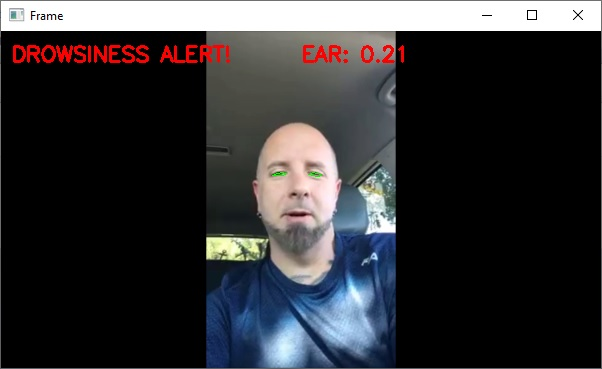

In [24]:
from IPython.display import Image
Image(filename='../Unknown/test_folder/result6.jpg') 

#### References:

    https://medium.com/analytics-vidhya/how-to-install-dlib-library-for-python-in-windows-10-57348ba1117f
    https://www.pyimagesearch.com/2017/04/10/detect-eyes-nose-lips-jaw-dlib-opencv-python/
    https://www.goeduhub.com/10547/driver-drowsiness-detection-using-opencv
    https://github.com/fiyero/OpenCV_Dlib_drunk_sleepy_alert_for_driver/blob/master/Drowsiness%20detection%20with%20OpenCV_github.ipynb